 !pip3 install pystan

In [78]:
!pip3 install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/sugimoto/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/1s/t71k99gj2dz1sq9b57fn9f_h0000gn/T/pip-install-ebebm28w/fbprophet_8c8b4ac1f2bc496bbd4afbdc50204579/setup.py'"'"'; __file__='"'"'/private/var/folders/1s/t71k99gj2dz1sq9b57fn9f_h0000gn/T/pip-install-ebebm28w/fbprophet_8c8b4ac1f2bc496bbd4afbdc50204579/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/1s/t71k99gj2dz1sq9b57fn9f_h0000gn/T/pip-wheel-ffrj02hu
       cwd: /private/var/folders/1s/t71k99gj2dz1sq9b57fn9f_h0000gn/T/pip-install-ebebm28w/fbprophet_8c8b4ac1f2bc496bbd4afbdc50204579/
  Complete output (39 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/

Failed to build fbprophet
    Running setup.py install for fbprophet ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/sugimoto/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/1s/t71k99gj2dz1sq9b57fn9f_h0000gn/T/pip-install-ebebm28w/fbprophet_8c8b4ac1f2bc496bbd4afbdc50204579/setup.py'"'"'; __file__='"'"'/private/var/folders/1s/t71k99gj2dz1sq9b57fn9f_h0000gn/T/pip-install-ebebm28w/fbprophet_8c8b4ac1f2bc496bbd4afbdc50204579/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/1s/t71k99gj2dz1sq9b57fn9f_h0000gn/T/pip-record-9fkg70oa/install-record.txt --single-version-externally-managed --compile --install-headers /Users/sugimoto/opt/anaconda3/include/python3.8/fbprophet
         cwd: /private/var/folders/1s/t71k99gj2dz1sq9b57fn9f_h0000gn/T/pip

In [1]:

#https://facebook.github.io/prophet/docs/quick_start.html

In [1]:
import pandas as pd
df = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2017.csv',encoding='shift-jis',skiprows=1)

In [2]:
df

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389
...,...,...,...
8755,2017/12/31,19:00,3527
8756,2017/12/31,20:00,3443
8757,2017/12/31,21:00,3335
8758,2017/12/31,22:00,3200


In [3]:
years = [2017,2018,2019]
year = years[0]
df2 = pd.DataFrame()
for year in years:
    df = pd.read_csv(f'https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv',encoding='shift-jis',skiprows=1)
    df2 = pd.concat([df2,df],axis=0)

In [4]:
len(df2)

26280

In [5]:
df2.tail()

,DATE,TIME,実績(万kW)
8755,2019/12/31,19:00,3302
8756,2019/12/31,20:00,3263
8757,2019/12/31,21:00,3182
8758,2019/12/31,22:00,3077
8759,2019/12/31,23:00,3029


In [6]:
df2 = df2.reset_index(drop=True)


In [7]:
df

,DATE,TIME,実績(万kW)
0,2019/1/1,0:00,3017
1,2019/1/1,1:00,2849
2,2019/1/1,2:00,2730
3,2019/1/1,3:00,2636
4,2019/1/1,4:00,2579
...,...,...,...
8755,2019/12/31,19:00,3302
8756,2019/12/31,20:00,3263
8757,2019/12/31,21:00,3182
8758,2019/12/31,22:00,3077


In [8]:
#プロフェットは日付と実績値が必要。従ってDTEとTIMEを結合
date = df2['DATE'][0]
time = df2['TIME'][0]
str_datetime = f'{date} {time}'

from datetime import datetime as dt
datetime = dt.strptime(str_datetime,'%Y/%m/%d %H:%M')

In [9]:
datetime 

datetime.datetime(2017, 1, 1, 0, 0)

In [10]:
str_datetime

'2017/1/1 0:00'

In [11]:
from datetime import datetime as dt

datetimes = []

for index,datum in df2.iterrows():
    date = datum['DATE']
    time = datum['TIME']
    str_datetime = f'{date} {time}'
    datetime = dt.strptime(str_datetime,'%Y/%m/%d %H:%M')
    datetimes.append(datetime)

In [12]:
datetimes

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 1, 0),
 datetime.datetime(2017, 1, 1, 2, 0),
 datetime.datetime(2017, 1, 1, 3, 0),
 datetime.datetime(2017, 1, 1, 4, 0),
 datetime.datetime(2017, 1, 1, 5, 0),
 datetime.datetime(2017, 1, 1, 6, 0),
 datetime.datetime(2017, 1, 1, 7, 0),
 datetime.datetime(2017, 1, 1, 8, 0),
 datetime.datetime(2017, 1, 1, 9, 0),
 datetime.datetime(2017, 1, 1, 10, 0),
 datetime.datetime(2017, 1, 1, 11, 0),
 datetime.datetime(2017, 1, 1, 12, 0),
 datetime.datetime(2017, 1, 1, 13, 0),
 datetime.datetime(2017, 1, 1, 14, 0),
 datetime.datetime(2017, 1, 1, 15, 0),
 datetime.datetime(2017, 1, 1, 16, 0),
 datetime.datetime(2017, 1, 1, 17, 0),
 datetime.datetime(2017, 1, 1, 18, 0),
 datetime.datetime(2017, 1, 1, 19, 0),
 datetime.datetime(2017, 1, 1, 20, 0),
 datetime.datetime(2017, 1, 1, 21, 0),
 datetime.datetime(2017, 1, 1, 22, 0),
 datetime.datetime(2017, 1, 1, 23, 0),
 datetime.datetime(2017, 1, 2, 0, 0),
 datetime.datetime(2017, 1, 2, 1, 0)

In [12]:
df2['ds'] = datetimes

In [13]:
df2

,DATE,TIME,実績(万kW),ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00
...,...,...,...,...
26275,2019/12/31,19:00,3302,2019-12-31 19:00:00
26276,2019/12/31,20:00,3263,2019-12-31 20:00:00
26277,2019/12/31,21:00,3182,2019-12-31 21:00:00
26278,2019/12/31,22:00,3077,2019-12-31 22:00:00


In [14]:
df2 = df2.rename(columns={'実績(万kW)':'y'})
df2

,DATE,TIME,y,ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00
...,...,...,...,...
26275,2019/12/31,19:00,3302,2019-12-31 19:00:00
26276,2019/12/31,20:00,3263,2019-12-31 20:00:00
26277,2019/12/31,21:00,3182,2019-12-31 21:00:00
26278,2019/12/31,22:00,3077,2019-12-31 22:00:00


In [15]:
df2.iterrows()

<generator object DataFrame.iterrows at 0x7f8cb3d54430>

In [16]:
# pip install pystan==2.18.0.0

# pip install fbprophet

In [17]:
from fbprophet import Prophet
model = Prophet()
model.fit(df2)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [18]:
df2

,DATE,TIME,y,ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00
...,...,...,...,...
26275,2019/12/31,19:00,3302,2019-12-31 19:00:00
26276,2019/12/31,20:00,3263,2019-12-31 20:00:00
26277,2019/12/31,21:00,3182,2019-12-31 21:00:00
26278,2019/12/31,22:00,3077,2019-12-31 22:00:00


In [19]:
future = model.make_future_dataframe(24*366,freq='H') #みらいである　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　2020年の日付データを作る

In [21]:
future.tail()

,ds
35059,2020-12-31 19:00:00
35060,2020-12-31 20:00:00
35061,2020-12-31 21:00:00
35062,2020-12-31 22:00:00
35063,2020-12-31 23:00:00


In [22]:
forecast = model.predict(future)

In [23]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          35064 non-null  datetime64[ns]
 1   trend                       35064 non-null  float64       
 2   yhat_lower                  35064 non-null  float64       
 3   yhat_upper                  35064 non-null  float64       
 4   trend_lower                 35064 non-null  float64       
 5   trend_upper                 35064 non-null  float64       
 6   additive_terms              35064 non-null  float64       
 7   additive_terms_lower        35064 non-null  float64       
 8   additive_terms_upper        35064 non-null  float64       
 9   daily                       35064 non-null  float64       
 10  daily_lower                 35064 non-null  float64       
 11  daily_upper                 35064 non-null  float64   

In [23]:
import matplotlib.pyplot as plt 

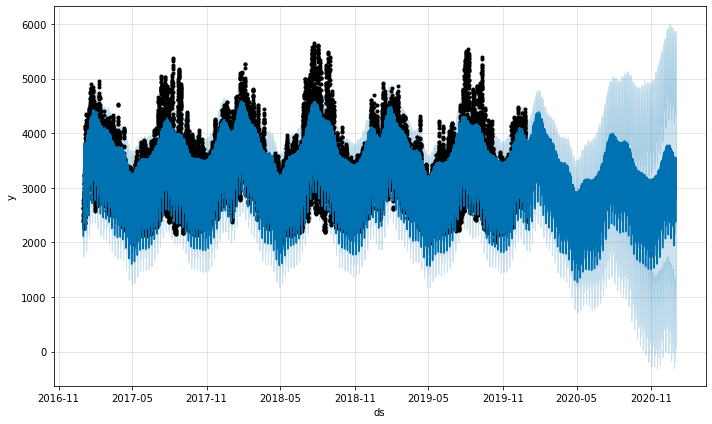

In [24]:
model.plot(forecast)
#plt.xlim(dt(2018,1,1),dt(2018,6,1))#範囲を狭める　青い線が予測　黒が実測値
plt.show()

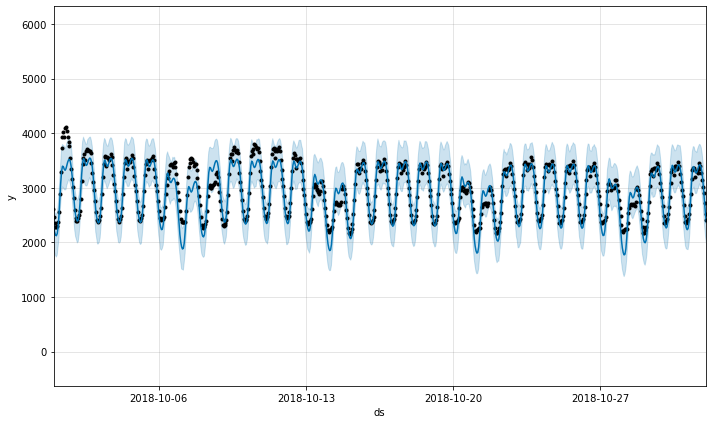

In [25]:
model.plot(forecast)
plt.xlim(dt(2018,10,1),dt(2018,11,1))#範囲を狭める　青い線が予測　黒が実測値
plt.show()

In [26]:
df_2020 = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2020.csv',encoding='shift-jis',skiprows=1)

In [27]:
forecast_2020 = forecast[forecast['ds']>=dt(2020,1,1)].reset_index(drop=True)
forecast_2020

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,3149.442591,2510.525968,3297.455202,3149.442591,3149.442591,-234.152101,-234.152101,-234.152101,-488.523245,...,108.821388,108.821388,108.821388,145.549756,145.549756,145.549756,0.0,0.0,0.0,2915.290490
1,2020-01-01 01:00:00,3149.406773,2405.810013,3175.287642,3149.406773,3149.406773,-363.880519,-363.880519,-363.880519,-617.442580,...,108.154668,108.154668,108.154668,145.407392,145.407392,145.407392,0.0,0.0,0.0,2785.526253
2,2020-01-01 02:00:00,3149.370954,2305.674609,3088.972234,3149.370954,3149.370954,-441.528290,-441.528290,-441.528290,-694.525127,...,107.725719,107.725719,107.725719,145.271118,145.271118,145.271118,0.0,0.0,0.0,2707.842664
3,2020-01-01 03:00:00,3149.335136,2284.744086,3039.948996,3149.335136,3149.335136,-475.448563,-475.448563,-475.448563,-728.117623,...,107.528110,107.528110,107.528110,145.140950,145.140950,145.140950,0.0,0.0,0.0,2673.886573
4,2020-01-01 04:00:00,3149.299318,2311.495143,3077.413013,3149.299318,3149.299318,-455.727461,-455.727461,-455.727461,-708.295812,...,107.551445,107.551445,107.551445,145.016906,145.016906,145.016906,0.0,0.0,0.0,2693.571857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,2834.993869,1242.483857,5689.584505,549.799531,5061.228054,661.317733,661.317733,661.317733,396.312578,...,120.826220,120.826220,120.826220,144.178934,144.178934,144.178934,0.0,0.0,0.0,3496.311602
8780,2020-12-31 20:00:00,2834.958051,1054.750190,5672.415661,549.522727,5061.541537,557.592233,557.592233,557.592233,292.231616,...,121.243555,121.243555,121.243555,144.117063,144.117063,144.117063,0.0,0.0,0.0,3392.550285
8781,2020-12-31 21:00:00,2834.922233,871.020759,5562.392409,549.245924,5061.855019,392.004464,392.004464,392.004464,126.207717,...,121.735250,121.735250,121.735250,144.061497,144.061497,144.061497,0.0,0.0,0.0,3226.926697
8782,2020-12-31 22:00:00,2834.886415,737.967086,5286.824609,548.969121,5062.168501,180.802524,180.802524,180.802524,-85.495255,...,122.285529,122.285529,122.285529,144.012251,144.012251,144.012251,0.0,0.0,0.0,3015.688939


In [28]:
df_2020 = df_2020.rename(columns = {'実績(万kW)':'y'})
df_2020#実測

,DATE,TIME,y
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464
...,...,...,...
8779,2020/12/31,19:00,3746
8780,2020/12/31,20:00,3673
8781,2020/12/31,21:00,3560
8782,2020/12/31,22:00,3443


In [29]:
forecast_2020['yhat']

0       2915.290490
1       2785.526253
2       2707.842664
3       2673.886573
4       2693.571857
           ...     
8779    3496.311602
8780    3392.550285
8781    3226.926697
8782    3015.688939
8783    2797.479216
Name: yhat, Length: 8784, dtype: float64

In [49]:
result = pd.DataFrame()

result['t'] =df_2020['y']
result['y']=forecast_2020['yhat']

result['diff'] = result['t'] - forecast_2020['yhat']

import numpy as np
np.mean(abs(result['y']-result['t'])/result['y']*100)

In [52]:
import numpy as np
np.mean(abs(result['y']-result['t'])/result['y']*100)

10.472591094377819

In [ ]:
https://atmarkit.itmedia.co.jp/ait/articles/2106/09/news028.html

In [33]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          35064 non-null  datetime64[ns]
 1   trend                       35064 non-null  float64       
 2   yhat_lower                  35064 non-null  float64       
 3   yhat_upper                  35064 non-null  float64       
 4   trend_lower                 35064 non-null  float64       
 5   trend_upper                 35064 non-null  float64       
 6   additive_terms              35064 non-null  float64       
 7   additive_terms_lower        35064 non-null  float64       
 8   additive_terms_upper        35064 non-null  float64       
 9   daily                       35064 non-null  float64       
 10  daily_lower                 35064 non-null  float64       
 11  daily_upper                 35064 non-null  float64   